In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

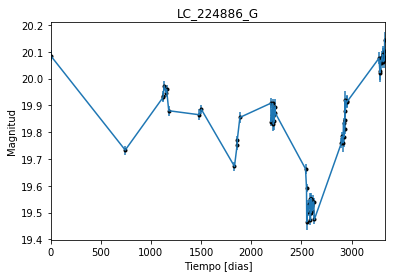

In [2]:
data = np.genfromtxt('LC_224886_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_224886_G')
plt.savefig("LC_224886_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

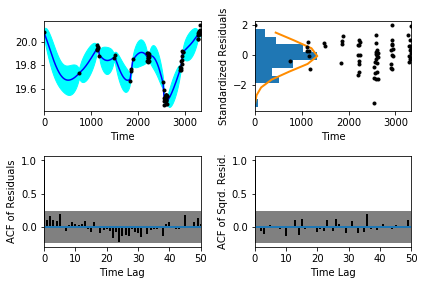

In [5]:
sample.assess_fit()

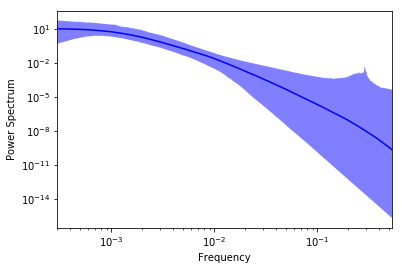

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

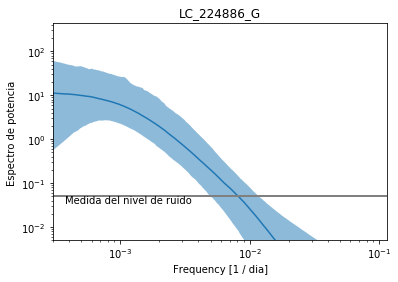

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_224886_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_224886_G')

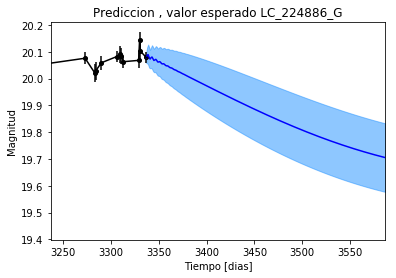

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_224886_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_224886_G')

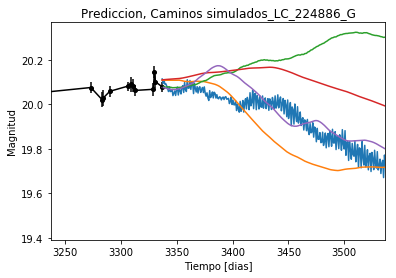

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_224886_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


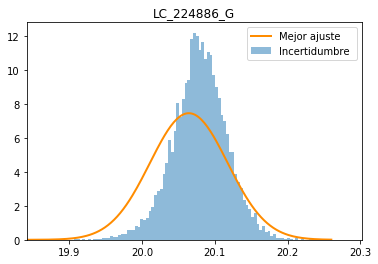

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_224886_G')
plt.savefig("Mejor_ajuste_LC_224886_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_224886_G')

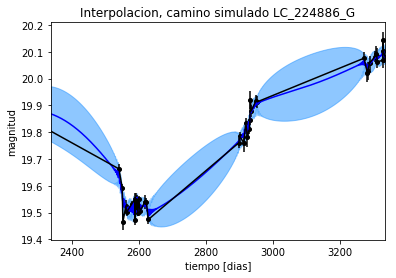

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_G')

Text(0.5,1,'Interpolacion, camino simulado LC_224886_G')

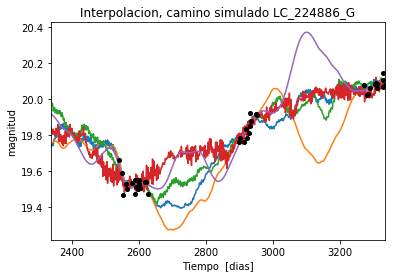

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 660.97559185
Median: 0.0153276469476
Standard deviation: 0.175715373799
68% credibility interval: [ 0.00130769  0.16571523]
95% credibility interval: [  3.81897061e-04   6.89704744e-01]
99% credibility interval: [  3.10828236e-04   9.46954721e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 333.447748218
Median: 0.00357233174657
Standard deviation: 0.0707540457582
68% credibility interval: [ 0.00061078  0.03578802]
95% credibility interval: [ 0.0003395   0.21843073]
99% credibility interval: [  3.05398711e-04   4.48317524e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 518.594987796
Median: 0.00984423090397
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 288.989070859
Median: 130.225055654
Standard deviation: 2.03321372888
68% credibility interval: [ 128.409454    131.89362662]
95% credibility interval: [ 125.94307087  134.36328537]
99% credibility interval: [ 124.02970919  135.36922001]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 729.148757269
Median: 0.672253399877
Standard deviation: 2.00873346983
68% credibility interval: [ 0.08413581  3.51184247]
95% credibility interval: [ 0.0215983   6.65151695]
99% credibility interval: [ 0.01452023  9.50029188]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 333.90284674
Median: 0.885256785194
Standard deviation: 9.11103393681
68% credibility interval: [ 0.03358055  9.01015339]
95% credibility interval: [  2.82530144e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19650.2256789
Median: 5.41751330023e-18
Standard deviation: 1.03532233045e+96
68% credibility interval: [  1.16863990e-62   5.70545051e+54]
95% credibility interval: [  1.94789957e-109   4.54512799e+071]
99% credibility interval: [  6.95643148e-125   5.19439677e+094]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 898.582008136
Median: 19.853248727
Standard deviation: 0.0789966011786
68% credibility interval: [ 19.80026528  19.93368827]
95% credibility interval: [ 19.72445209  20.04282077]
99% credibility interval: [ 19.64569031  20.12660519]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 226.008430377
Median: 0.0129258169318
Standard deviation: 0.261744990161
68% credibility interval: [ 0.          0.41193661]
95% credibility interval: [ 0.          0.90382064]
99% credibility interval: [ 0.          1.02848062]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 226.008430377
Median: 0.0129258169318
Standard deviation: 0.261744990161
68% credibility interval: [ 0.          0.41193661]
95% credibility interval: [ 0.          0.90382064]
99% credibility interval: [ 0.          1.02848062]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 514.126576433
Median: 0.0
Standard deviation: 0.000525400866402
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 288.989070859
Median: 130.225055654
Standard deviation: 2.03321372888
68% credibility interval: [ 128.409454    131.89362662]
95% credibility interval: [ 125.94307087  134.36328537]
99% credibility interval: [ 124.02970919  135.36922001]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 423.865879653
Median: 0.0351269480783
Standard deviation: 0.0329641989639
68% credibility interval: [ 0.02019463  0.0627836 ]
95% credibility interval: [ 0.01366426  0.11895815]
99% credibility interval: [ 0.01059115  0.18904721]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 217.214504567
Median: 1.45795465882
Standard deviation: 0.27558652217
68% credibility interval: [ 1.16025246  1.72290224]
95% credibility interval: [ 0.86190599  1.92598503]
99% credibility interval: [ 0.7362225   1.98920234]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 222.894523569
Median: 0.000202131397154
Standard deviation: 0.186114171701
68% credibility interval: [  1.23381366e-56   5.65005058e-03]
95% credibility interval: [  1.78300449e-76   2.70632172e-01]
99% credibility interval: [  1.02771082e-98   1.64645119e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 660.97559185
Median: (-0.0963064460946-5.57156866262j)
Standard deviation: 1.98081173693
68% credibility interval: [-1.04121950-4.67946354j -0.00821644-1.83607146j]
95% credibility interval: [ -4.33354271e+00+0.j          -2.39953000e-03-1.00461704j]
99% credibility interval: [ -5.94989199e+00+0.j          -1.95299141e-03-0.00419881j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 333.447748218
Median: (-0.0224456223424+0j)
Standard deviation: 1.70361910161
68% credibility interval: [-0.22486274+0.29955691j -0.00383765+0.00501153j]
95% credibility interval: [-1.37244078+2.86400537j -0.00213312+0.j        ]
99% credibility interval: [ -2.81686208e+00+4.79514568j  -1.91887670e-03+0.00609704j]
Posterior summary for param